In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

16000 114958


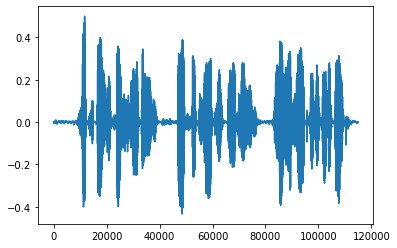

In [6]:
sample, sr = sf.read("p232_003.wav")
print(sr, sample.size)
plt.plot(sample)

In [8]:
filename = "bin/wavinput.bin"
with open(filename, 'wb') as f:
    sample.astype(np.float32).tofile(f)

In [3]:
time = np.linspace(0, 1, 512)
def sinwave(amp, freq, time, phase=0):
  return amp * np.sin(freq*time + phase)

def coswave(amp, freq, time, phase=0):
  return amp * np.cos(freq*time + phase)

def Wavg(input):
  return input.sum()/input.size

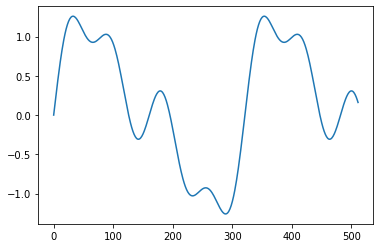

(512,) float32


In [4]:
w31 = sinwave(1, 10, time)
w32 = sinwave(0.5, 20, time)
w33 = sinwave(1/3, 40, time)
sample = w31+w32+w33
sample = sample.astype(np.float32)
filename = "bin/input.bin"
with open(filename, 'wb') as f:
    sample.tofile(f)
plt.plot(sample)
plt.show()
print(sample.shape, sample.dtype)

In [6]:
with open("bin/export/output.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    res = np.fromfile(f, dtype=rectype)

(1024,) float32


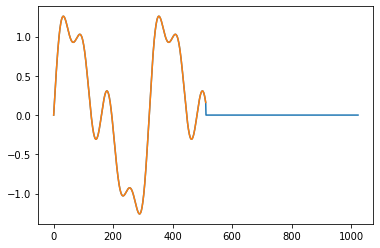

In [7]:
with open("bin/export/recover.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    rec = np.fromfile(f, dtype=rectype)
print(rec.shape, rec.dtype)
plt.plot(rec)
plt.plot(sample)

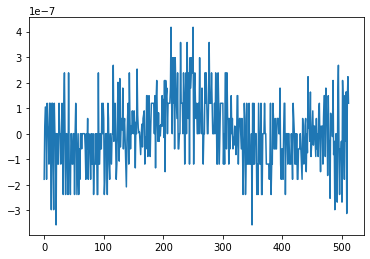

In [8]:
plt.plot(rec[:512] - sample)